# Final Capstone Project: Battle of the Neighborhoods
# Oxford, UK versus Atlanta, USA
### Author: Theresa Foster
### Date: 13 May 2020

## Import Libraries

In [41]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

### Using Watson data 'Insert to Code' to upload Oxford data set

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f4afcc32a749405a820c7a96506e474b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mJgELIymbAk2agYlHiz9ii6s9aVHMVoaxJ5-o6EbCkIT',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f4afcc32a749405a820c7a96506e474b.get_object(Bucket='courseracapstonetkf-donotdelete-pr-dmzgetziwgvl02',Key='Oxford postcode and neighborhood data edited.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_OXF = pd.read_excel(body)
df_data_OXF.head()


,Postal Code,Neighborhood,Latitude,Longitude
0,OX3 0FR,Barton and Sandhills,51.770563,-1.208585
1,OX4 6AA,Blackbird Leys,51.722543,-1.204506
2,OX1 1AA,Carfax,51.750231,-1.267367
3,OX3 0BD,Churchill,51.753788,-1.230251
4,OX4 2BH,Cowley,51.730350,-1.206266


### Using Watson data 'Insert to Code' to upload Atlanta data set

In [18]:

body = client_f4afcc32a749405a820c7a96506e474b.get_object(Bucket='courseracapstonetkf-donotdelete-pr-dmzgetziwgvl02',Key='Atlanta Neighborhoods and zipcodes 1.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_ATL = pd.read_excel(body)
df_data_ATL.head()


,Postal Code,Neighborhood
0,30002,Avondale Estates
1,30030,"City of Decatur, Oakhurst, Winnona Park"
2,30032,"East Lake, South Decatur"
3,30033,"North Decatur, Emory"
4,30303,Downtown Atlanta


### Using Watson data 'Insert to Code' to upload Atlanta Zip code and Longitude and Latitude data

In [21]:

body = client_f4afcc32a749405a820c7a96506e474b.get_object(Bucket='courseracapstonetkf-donotdelete-pr-dmzgetziwgvl02',Key='USA LL and zipcaodes Atlanta.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_LL = pd.read_excel(body)
df_data_LL.head()


,Zip,City,State,Latitude,Longitude
0,31150,Atlanta,GA,33.844371,-84.474050
1,30334,Atlanta,GA,33.702657,-84.439127
2,30384,Atlanta,GA,33.844371,-84.474050
3,30339,Atlanta,GA,33.875070,-84.466150
4,30354,Atlanta,GA,33.658834,-84.396820


### Using a join to add the Latitude and Longitudes to the Atlanta data set by postal code and zip code

In [22]:
merged_ATL = pd.merge(left=df_data_ATL, right=df_data_LL, left_on='Postal Code', right_on='Zip')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged_ATL.shape
merged_ATL.head()

,Postal Code,Neighborhood,Zip,City,State,Latitude,Longitude
0,30303,Downtown Atlanta,30303,Atlanta,GA,33.752856,-84.39013
1,30305,"Buckhead, Garden Hills, Peachtree Hills",30305,Atlanta,GA,33.830054,-84.38472
2,30306,"Virginia Highlands, Morningside",30306,Atlanta,GA,33.786755,-84.35149
3,30307,"Candler Park, Inman Park, Lake Claire, Druid H...",30307,Atlanta,GA,33.768205,-84.33786
4,30308,"Midtown Atlanta, Old Fourth Ward",30308,Atlanta,GA,33.771755,-84.38065


### Dropping unnecessary columns from the new merged Atlanta dataframe

In [ ]:
merged_ATL = merged_ATL.drop(['Zip', 'City', 'State'], axis=1)

In [31]:
merged_ATL.head()

,Postal Code,Neighborhood,Latitude,Longitude
0,30303,Downtown Atlanta,33.752856,-84.39013
1,30305,"Buckhead, Garden Hills, Peachtree Hills",33.830054,-84.38472
2,30306,"Virginia Highlands, Morningside",33.786755,-84.35149
3,30307,"Candler Park, Inman Park, Lake Claire, Druid H...",33.768205,-84.33786
4,30308,"Midtown Atlanta, Old Fourth Ward",33.771755,-84.38065


### Checking the shape of both data frames for Oxford and Atlanta Neighborhoods

In [27]:
merged_ATL.shape

(24, 4)

In [28]:
df_data_OXF.shape

(24, 4)

## Viewing the dataframes side by side to check format

In [32]:
horizontal_stack = pd.concat([df_data_OXF, merged_ATL], axis=1)
horizontal_stack

,Postal Code,Neighborhood,Latitude,Longitude,Postal Code,Neighborhood,Latitude,Longitude
0,OX3 0FR,Barton and Sandhills,51.770563,-1.208585,30303,Downtown Atlanta,33.752856,-84.39013
1,OX4 6AA,Blackbird Leys,51.722543,-1.204506,30305,"Buckhead, Garden Hills, Peachtree Hills",33.830054,-84.38472
2,OX1 1AA,Carfax,51.750231,-1.267367,30306,"Virginia Highlands, Morningside",33.786755,-84.35149
3,OX3 0BD,Churchill,51.753788,-1.230251,30307,"Candler Park, Inman Park, Lake Claire, Druid H...",33.768205,-84.33786
4,OX4 2BH,Cowley,51.730350,-1.206266,30308,"Midtown Atlanta, Old Fourth Ward",33.771755,-84.38065
5,OX4 1PF,Cowley Marsh,51.747236,-1.221107,30309,"Ansley Park, Midtown Atlanta",33.794055,-84.38525
6,OX3 7AA,Headington,51.758986,-1.214008,30310,"West End, Sylvan Hills, Adair Park",33.727807,-84.41983
7,OX3 0AA,Headington Hill and Northway,51.764410,-1.225289,30312,"Grant Park, Cabbagetown, Old Fourth Ward",33.745739,-84.37640
8,OX1 1RP,Hinksey Park,51.748010,-1.261638,30315,"Grant Park, Peoplestown, Choosewood Park",33.709595,-84.38365
9,OX1 1BN,Holywell,51.747848,-1.255904,30316,"Cabbagetown, East Atlanta Village, Ormewood Park",33.729506,-84.34087


## Map out the nieghborhoods in each city for initial Visual analysis

### Find the Latitude and Longitude of Oxford, UK

In [37]:
address = 'Oxford, UK'

geolocator = Nominatim(user_agent="Oxf_explorer")
location = geolocator.geocode(address)
latitude_OXF = location.latitude
longitude_OXF = location.longitude
print('The geograpical coordinates of Oxford, UK are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Oxford, UK are 33.7490987, -84.3901849.


### Find the Latitude and Longitude of Atlanta, GA, USA

In [38]:
address = 'Atlanta, GA'

geolocator = Nominatim(user_agent="Atl_explorer")
location = geolocator.geocode(address)
latitude_ATL = location.latitude
longitude_ATL = location.longitude
print('The geograpical coordinates of Atlanta, GA are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Atlanta, GA are 33.7490987, -84.3901849.


### Create a map of Oxford, UK with Neighborhoods

In [45]:
map_Oxford = folium.Map(location=[latitude_OXF, longitude_OXF], zoom_start=13)

# add markers to map
for lat, lng, neighborhood in zip(df_data_OXF['Latitude'], df_data_OXF['Longitude'], df_data_OXF['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Oxford)  
    
map_Oxford

### Create a Map of Atlanta, GA Neighborhoods

In [47]:
map_Atlanta = folium.Map(location=[latitude_ATL, longitude_ATL], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(merged_ATL['Latitude'], merged_ATL['Longitude'], merged_ATL['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Atlanta)  
    
map_Atlanta

## Define Foursquare API credentials to set up source for neighborhood venue analysis

In [48]:
CLIENT_ID = 'RKTDGK0OLPAEWNXLU1EWZHS32ZCGF2GYYQPUWKGX0HF01P4E' # your Foursquare ID
CLIENT_SECRET = '0M5NZXYUPUYSUVK134HLG4MY5SYTHQDDUVZU21TNHYG5JSG3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RKTDGK0OLPAEWNXLU1EWZHS32ZCGF2GYYQPUWKGX0HF01P4E
CLIENT_SECRET:0M5NZXYUPUYSUVK134HLG4MY5SYTHQDDUVZU21TNHYG5JSG3


# Oxford, UK Analysis and Mapping

## Set up code to retrieve a list of venues in the Oxford Neighborhoods

In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_OXF = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_OXF.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_OXF)

In [50]:
Oxford_venues = getNearbyVenues(names=df_data_OXF['Neighborhood'],
                                   latitudes=df_data_OXF['Latitude'],
                                   longitudes=df_data_OXF['Longitude']
                                  )

Barton and Sandhills
Blackbird Leys
Carfax
Churchill
Cowley
Cowley Marsh
Headington
Headington Hill and Northway
Hinksey Park
Holywell
Iffley Fields
Jericho and Osney
Littlemore
Lye Valley
Marston
North
Northfield Brook
Quarry and Risinghurst
Rose Hill and Iffley
St Clement's
St Margaret's
St Mary's
Summertown
Wolvercote


### View the Oxford venues dataframe shape and first 5 rows

In [51]:
print(Oxford_venues.shape)
Oxford_venues.head()

(375, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barton and Sandhills,51.770563,-1.208585,bus stop barton village road,51.768160,-1.203738,Bus Stop
1,Barton and Sandhills,51.770563,-1.208585,Booty,51.766914,-1.210675,Boutique
2,Blackbird Leys,51.722543,-1.204506,Soundworks,51.722242,-1.201936,Music Venue
3,Blackbird Leys,51.722543,-1.204506,The Blackbird,51.721002,-1.202126,Pub
4,Blackbird Leys,51.722543,-1.204506,Delteys Supermarket,51.720504,-1.202680,Convenience Store


In [57]:
print('There are {} uniques categories of venues.'.format(len(Oxford_venues['Venue Category'].unique())))
(Oxford_venues.groupby('Neighborhood').count())

There are 102 uniques categories of venues.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barton and Sandhills,2,2,2,2,2,2
Blackbird Leys,5,5,5,5,5,5
Carfax,62,62,62,62,62,62
Churchill,5,5,5,5,5,5
Cowley,12,12,12,12,12,12
Headington,27,27,27,27,27,27
Headington Hill and Northway,5,5,5,5,5,5
Hinksey Park,44,44,44,44,44,44
Holywell,47,47,47,47,47,47


### Use one-hot encoding to code the venues by category in Oxford Neighborhoods

In [58]:
# one hot encoding
Oxford_onehot = pd.get_dummies(Oxford_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Oxford_onehot['Neighborhood'] = Oxford_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Oxford_onehot.columns[-1]] + list(Oxford_onehot.columns[:-1])
Oxford_onehot = Oxford_onehot[fixed_columns]

Oxford_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Asian Restaurant,Bakery,Bar,Beer Bar,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Stop,Café,Canal,Canal Lock,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Food Truck,French Restaurant,Garden,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Lebanese Restaurant,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,Nightclub,Noodle House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Skating Rink,Spanish Restaurant,Sporting Goods Shop,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Trail,Turkish Restaurant,Vietnamese Restaurant,Wine Bar
0,Barton and Sandhills,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barton and Sandhills,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Blackbird Leys,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Blackbird Leys,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Blackbird Leys,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### List the mean frequency of venue categories in each Oxford Neighborhood 

In [87]:
Oxford_grouped = Oxford_onehot.groupby('Neighborhood').mean().reset_index()
Oxford_grouped

,Neighborhood,American Restaurant,Art Gallery,Asian Restaurant,Bakery,Bar,Beer Bar,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Stop,Café,Canal,Canal Lock,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Food Truck,French Restaurant,Garden,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Lebanese Restaurant,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,Nightclub,Noodle House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Skating Rink,Spanish Restaurant,Sporting Goods Shop,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Trail,Turkish Restaurant,Vietnamese Restaurant,Wine Bar
0,Barton and Sandhills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
1,Blackbird Leys,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
2,Carfax,0.016129,0.000000,0.000000,0.032258,0.064516,0.000000,0.000000,0.016129,0.0,0.000000,0.016129,0.000000,0.016129,0.000000,0.032258,0.016129,0.016129,0.000000,0.032258,0.016129,0.000000,0.016129,0.000000,0.000000,0.0,0.000000,0.000000,0.016129,0.000000,0.000000,0.016129,0.000000,0.00,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.048387,0.016129,0.000000,0.048387,0.032258,0.016129,0.00,0.016129,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.016129,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000,0.0,0.000000,0.000000,0.032258,0.016129,0.0,0.016129,0.0,0.032258,0.080645,0.016129,0.000000,0.0,0.016129,0.000000,0.016129,0.032258,0.016129,0.016129,0.016129,0.000000,0.000000,0.000,0.016129,0.00000

### Check the shape of the new dataframe

In [60]:
Oxford_grouped.shape

(23, 103)

### View the Top 5 venues in each Oxford Neighborhood

In [61]:
num_top_venues = 5

for hood in Oxford_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Oxford_grouped[Oxford_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barton and Sandhills----
         venue  freq
0     Bus Stop   0.5
1     Boutique   0.5
2  Music Venue   0.0
3        Plaza   0.0
4   Playground   0.0


----Blackbird Leys----
               venue  freq
0                Pub   0.2
1        Music Venue   0.2
2  Convenience Store   0.2
3  Recreation Center   0.2
4           Bus Stop   0.2


----Carfax----
               venue  freq
0                Pub  0.08
1                Bar  0.06
2          Nightclub  0.06
3  Indian Restaurant  0.05
4              Hotel  0.05


----Churchill----
                  venue  freq
0         Deli / Bodega   0.2
1                  Café   0.2
2           Coffee Shop   0.2
3  Gym / Fitness Center   0.2
4                  Park   0.2


----Cowley----
                  venue  freq
0                Market  0.08
1           Supermarket  0.08
2                   Pub  0.08
3  Fast Food Restaurant  0.08
4           Coffee Shop  0.08


----Headington----
                venue  freq
0       Grocery Store  0.15
1    

### Now make a dataframe with the top 10 venues in each neighborhood

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
OXF_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
OXF_neighborhoods_venues_sorted['Neighborhood'] = Oxford_grouped['Neighborhood']

for ind in np.arange(Oxford_grouped.shape[0]):
    OXF_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Oxford_grouped.iloc[ind, :], num_top_venues)

OXF_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barton and Sandhills,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field
1,Blackbird Leys,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store,Wine Bar,Department Store,Dessert Shop,Discount Store,Donut Shop
2,Carfax,Pub,Bar,Nightclub,Hotel,Indian Restaurant,Pizza Place,Sandwich Place,Portuguese Restaurant,Bakery,Hostel
3,Churchill,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop
4,Cowley,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop,Market,Pub,Supermarket,Grocery Store,Gym / Fitness Center


## Cluster the Oxford Neighborhoods using K-Means

### Using metrics to determine the best value for K

In [197]:
from sklearn.metrics import silhouette_score

sil=[]
K_sil= range(2,10)
Oxford_grouped_clustering = Oxford_grouped.drop('Neighborhood', 1)
for k in K_sil:
    print(k, end='')
    kmeans=KMeans(n_clusters= k).fit(Oxford_grouped_clustering)
    labels= kmeans.labels_
    sil.append(silhouette_score(Oxford_grouped_clustering, labels, metric='euclidean'))

23456789

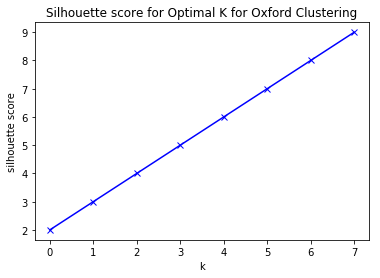

In [195]:
import matplotlib.pyplot as plt
plt.plot(K_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score for Optimal K for Oxford Clustering')
plt.show()

In [219]:
sum_of_squared_distances = []
K=range(2,10)
Oxford_grouped_clustering = Oxford_grouped.drop('Neighborhood', 1)
for k in K:
    print(k, end='')
    kmeans=KMeans(n_clusters= k).fit(Oxford_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

23456789

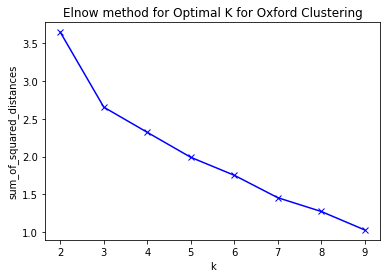

In [220]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elnow method for Optimal K for Oxford Clustering')
plt.show()

### I will set K to 5 as the optimal K value at 3 (elbow method) seems a little low to cluster Neighborhoods effectively and the Silhouette method (7+), seems too high for only 24 neighborhoods. 

In [240]:
kclusters = 5

Oxford_grouped_clustering = Oxford_grouped.drop('Neighborhood', 1)

kmeansOXF = KMeans(n_clusters=kclusters, random_state=0).fit(Oxford_grouped_clustering)

kmeansOXF.labels_[1:10] 

array([4, 4, 3, 4, 4, 3, 4, 4, 1], dtype=int32)

### Create a new dataframe with the cluster labels appended as a column

In [ ]:
OXF_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeansOXF.labels_)

Oxford_merged = df_data_OXF

Oxford_merged = Oxford_merged.join(OXF_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [242]:
Oxford_merged

,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,OX3 0FR,Barton and Sandhills,51.770563,-1.208585,0.0,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field
1,OX4 6AA,Blackbird Leys,51.722543,-1.204506,4.0,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store,Wine Bar,Department Store,Dessert Shop,Discount Store,Donut Shop
2,OX1 1AA,Carfax,51.750231,-1.267367,4.0,Pub,Bar,Nightclub,Hotel,Indian Restaurant,Pizza Place,Sandwich Place,Portuguese Restaurant,Bakery,Hostel
3,OX3 0BD,Churchill,51.753788,-1.230251,3.0,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop
4,OX4 2BH,Cowley,51.730350,-1.206266,4.0,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop,Market,Pub,Supermarket,Grocery Store,Gym / Fitness Center
5,OX4 1PF,Cowley Marsh,51.747236,-1.221107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,OX3 7AA,Headington,51.758986,-1.214008,4.0,Grocery Store,Supermarket,Sandwich Place,Bus Stop,Coffee Shop,Pub,Chinese Restaurant,Café,Pharmacy,Pizza Place
7,OX3 0AA,Headington Hill and Northway,51.764410,-1.225289,3.0,Café,Coffee Shop,Nightclub,Sandwich Place,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop,Electronics Store
8,OX1 1RP,Hinksey Park,51.748010,-1.261638,4.0,Pub,Café,Bakery,Bar,Lebanese Restaurant,Hotel,Ice Cream Shop,Gym / Fitness Center,Museum,Movie Theater
9,OX1 1BN,Holywell,51.747848,-1.255904,4.0,Pub,Bakery,Sandwich Place,Art Gallery,Bar,Indian Restaurant,Scandinavian Restaurant,Ice Cream Shop,Movie Theater,Vietnamese Restaurant


   ### Make sure the Cluster Labels are integers and not floats as they will not map properly otherwise

In [243]:
Oxford_merged_Final = Oxford_merged.dropna()
Oxford_merged_Final['Cluster Labels'] =Oxford_merged_Final['Cluster Labels'].astype(int)
Oxford_merged_Final.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,OX3 0FR,Barton and Sandhills,51.770563,-1.208585,0,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field
1,OX4 6AA,Blackbird Leys,51.722543,-1.204506,4,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store,Wine Bar,Department Store,Dessert Shop,Discount Store,Donut Shop
2,OX1 1AA,Carfax,51.750231,-1.267367,4,Pub,Bar,Nightclub,Hotel,Indian Restaurant,Pizza Place,Sandwich Place,Portuguese Restaurant,Bakery,Hostel
3,OX3 0BD,Churchill,51.753788,-1.230251,3,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop
4,OX4 2BH,Cowley,51.730350,-1.206266,4,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop,Market,Pub,Supermarket,Grocery Store,Gym / Fitness Center


## Map the clustered Neighborhoods in Oxford UK 

In [244]:
map_oxford_clusters = folium.Map(location=[latitude_OXF, longitude_OXF], zoom_start=13)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Oxford_merged_Final['Latitude'], Oxford_merged_Final['Longitude'], Oxford_merged_Final['Neighborhood'], Oxford_merged_Final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=0.9).add_to(map_oxford_clusters)
       
map_oxford_clusters

## View a list of each cluster to determine the top venues in each and label them

## Cluster 0 (Red): Bus Transport, Boutiques and Food

In [245]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 0, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barton and Sandhills,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field


## Cluster 1 (Purple): Pubs and Gyms

In [246]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 1, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Iffley Fields,Pub,College Gym,Thai Restaurant,Flower Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store


## Cluster 2 (Light Blue): Small Shops and Food

In [247]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 2, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Littlemore,Miscellaneous Shop,Wine Bar,Food Truck,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant


## Cluster 3 (Light Green): Cafes and Parks

In [248]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 3, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Churchill,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop
7,Headington Hill and Northway,Café,Coffee Shop,Nightclub,Sandwich Place,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop,Electronics Store
20,St Margaret's,Park,Deli / Bodega,Pub,Convenience Store,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market


## Cluster 4 (Orange): Pubs, Shopping Mall, Restaurants, Museums and Bars

In [249]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 4, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Blackbird Leys,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store,Wine Bar,Department Store,Dessert Shop,Discount Store,Donut Shop
2,Carfax,Pub,Bar,Nightclub,Hotel,Indian Restaurant,Pizza Place,Sandwich Place,Portuguese Restaurant,Bakery,Hostel
4,Cowley,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop,Market,Pub,Supermarket,Grocery Store,Gym / Fitness Center
6,Headington,Grocery Store,Supermarket,Sandwich Place,Bus Stop,Coffee Shop,Pub,Chinese Restaurant,Café,Pharmacy,Pizza Place
8,Hinksey Park,Pub,Café,Bakery,Bar,Lebanese Restaurant,Hotel,Ice Cream Shop,Gym / Fitness Center,Museum,Movie Theater
9,Holywell,Pub,Bakery,Sandwich Place,Art Gallery,Bar,Indian Restaurant,Scandinavian Restaurant,Ice Cream Shop,Movie Theater,Vietnamese Restaurant
11,Jericho and Osney,Pub,Middle Eastern Restaurant,Greek Restaurant,Fish & Chips Shop,Flower Shop,Café,Pizza Place,French Restaurant,Chinese Restaurant,Gym
13,Lye Valley,Bus Stop,Nature Preserve,Coffee Shop,Pub,Chinese Restaurant,Pharmacy,Indian Restaurant,Gym,Grocery Store,Dessert Shop
14,Marston,Trail,Bar,Liquor Store,Park,Wine Bar,Flower Shop,Department Store,Dessert Shop,Discount Store,Donut Shop
15,North,Pub,History Museum,French Restaurant,Italian Restaurant,Pizza Place,Cocktail Bar,Café,Coffee Shop,Convenience Store,Electronics Store


# Atlanta, USA Analysis and Mapping

## Set up the Foursquare API code to retrieve venue data on Atlanta Neighborhoods

In [156]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_ATL = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_ATL.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_ATL)

In [157]:
Atlanta_venues = getNearbyVenues(names=merged_ATL['Neighborhood'],
                                   latitudes=merged_ATL['Latitude'],
                                   longitudes=merged_ATL['Longitude']
                                  )

Downtown Atlanta
Buckhead, Garden Hills, Peachtree Hills
Virginia Highlands, Morningside
Candler Park, Inman Park, Lake Claire, Druid Hills
Midtown Atlanta, Old Fourth Ward
Ansley Park, Midtown Atlanta
West End, Sylvan Hills, Adair Park
Grant Park, Cabbagetown, Old Fourth Ward
Grant Park, Peoplestown, Choosewood Park
Cabbagetown, East Atlanta Village, Ormewood Park
Kirkwood, East Lake, Edgewood
Underwood Hills, Midtown West
Brookhaven, Buckhead, Ashford Park
Morningside, Pine Hills, Piedmont Heights, Woodland Hills
Sandy Springs, Buckead
Sandy Springs, Riverside
Victoria Estates, Toco Hills
Dunwoody
Vinings, North Buckhead
Ticker, Doraville
Brookhave, Ashford Park, Chamblee
Chastain Park, Pine Hills, Piedmont Heights
Oak Grove, Sagamore Hills
Atlantic Station


### View the Atlanta venues dataframe shape and first 5 rows

In [158]:
print(Atlanta_venues.shape)
Atlanta_venues.head()

(297, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Atlanta,33.752856,-84.39013,Walgreens,33.754345,-84.389484,Pharmacy
1,Downtown Atlanta,33.752856,-84.39013,Ebrik Coffee Room,33.753897,-84.388782,Coffee Shop
2,Downtown Atlanta,33.752856,-84.39013,The Masquerade,33.751720,-84.389739,Music Venue
3,Downtown Atlanta,33.752856,-84.39013,Weekday Cafe,33.754278,-84.388892,Burger Joint
4,Downtown Atlanta,33.752856,-84.39013,Blossom Tree,33.755496,-84.389006,Korean Restaurant


In [159]:
print('There are {} uniques categories of venues.'.format(len(Atlanta_venues['Venue Category'].unique())))
(Atlanta_venues.groupby('Neighborhood').count())

There are 144 uniques categories of venues.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Ansley Park, Midtown Atlanta",23,23,23,23,23,23
"Brookhave, Ashford Park, Chamblee",11,11,11,11,11,11
"Brookhaven, Buckhead, Ashford Park",35,35,35,35,35,35
"Buckhead, Garden Hills, Peachtree Hills",20,20,20,20,20,20
"Cabbagetown, East Atlanta Village, Ormewood Park",4,4,4,4,4,4
"Candler Park, Inman Park, Lake Claire, Druid Hills",8,8,8,8,8,8
Downtown Atlanta,36,36,36,36,36,36
Dunwoody,5,5,5,5,5,5
"Grant Park, Cabbagetown, Old Fourth Ward",33,33,33,33,33,33


### Use one-hot encoding to code Atlanta venues by category

In [160]:
# one hot encoding
Atlanta_onehot = pd.get_dummies(Atlanta_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Atlanta_onehot['Neighborhood'] = Atlanta_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Atlanta_onehot.columns[-1]] + list(Atlanta_onehot.columns[:-1])
Atlanta_onehot = Atlanta_onehot[fixed_columns]

Atlanta_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Baseball Field,Basketball Court,Beer Store,Big Box Store,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Business Service,Café,Caribbean Restaurant,Cemetery,Chinese Restaurant,Church,Clothing Store,Coffee Shop,College & University,College Basketball Court,Comedy Club,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store,Doctor's Office,Donut Shop,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food Service,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,High School,History Museum,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Smoothie Shop,Soup Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wings Joint,Yoga Studio
0,Downtown Atlanta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Downtown Atlanta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Downtown Atlanta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Downtown Atlanta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Downtown Atlanta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### List the mean frequency of each venue category in each Atlanta Neighborhood

In [161]:
Atlanta_grouped = Atlanta_onehot.groupby('Neighborhood').mean().reset_index()
Atlanta_grouped

,Neighborhood,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Baseball Field,Basketball Court,Beer Store,Big Box Store,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Business Service,Café,Caribbean Restaurant,Cemetery,Chinese Restaurant,Church,Clothing Store,Coffee Shop,College & University,College Basketball Court,Comedy Club,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store,Doctor's Office,Donut Shop,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food Service,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,High School,History Museum,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Smoothie Shop,Soup Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wings Joint,Yoga Studio
0,"Ansley Park, Midtown Atlanta",0.043478,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.00,0.086957,0.000000,0.000000,0.000000,0.000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.0,0.043478,0.00,0.000000,0.043478,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.043478,0.000000,0.000000,0.043478,0.130435,0.000000,0.043478,0.000000,0.000,0.0000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000,0.043478,0.000000,0.086957,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brookhave, Ashford Park, Chamblee",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.090909,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.

### Check the shape of the new dataframe

In [162]:
Atlanta_grouped.shape

(22, 145)

### List the Top 5 venues in each neighborhood in Atlanta

In [163]:
num_top_venues = 5

for hood in Atlanta_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Atlanta_grouped[Atlanta_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ansley Park, Midtown Atlanta----
                 venue  freq
0          Music Venue  0.13
1       Sandwich Place  0.09
2                 Café  0.09
3  American Restaurant  0.04
4       Breakfast Spot  0.04


----Brookhave, Ashford Park, Chamblee----
                     venue  freq
0    Vietnamese Restaurant  0.27
1  Fruit & Vegetable Store  0.09
2       Mexican Restaurant  0.09
3       Chinese Restaurant  0.09
4        Korean Restaurant  0.09


----Brookhaven, Buckhead, Ashford Park----
                  venue  freq
0   American Restaurant  0.09
1  Gym / Fitness Center  0.09
2    Frozen Yogurt Shop  0.06
3        Sandwich Place  0.06
4        Ice Cream Shop  0.06


----Buckhead, Garden Hills, Peachtree Hills----
                  venue  freq
0    Italian Restaurant  0.10
1                  Café  0.05
2  Gym / Fitness Center  0.05
3                  Park  0.05
4    Salon / Barbershop  0.05


----Cabbagetown, East Atlanta Village, Ormewood Park----
            venue  freq
0        

### Make a dataframe with the Top 10 Venues in each Atlanta Neighborhood

In [164]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ATL_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ATL_neighborhoods_venues_sorted['Neighborhood'] = Atlanta_grouped['Neighborhood']

for ind in np.arange(Atlanta_grouped.shape[0]):
    ATL_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Atlanta_grouped.iloc[ind, :], num_top_venues)

ATL_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Ansley Park, Midtown Atlanta",Music Venue,Sandwich Place,Café,American Restaurant,Breakfast Spot,History Museum,Hotel,Jewelry Store,Gas Station,Monument / Landmark
1,"Brookhave, Ashford Park, Chamblee",Vietnamese Restaurant,Mexican Restaurant,Food,Fruit & Vegetable Store,Furniture / Home Store,Chinese Restaurant,Rental Car Location,Restaurant,Korean Restaurant,Farmers Market
2,"Brookhaven, Buckhead, Ashford Park",American Restaurant,Gym / Fitness Center,Sandwich Place,Frozen Yogurt Shop,Mexican Restaurant,Ice Cream Shop,College & University,Shopping Mall,Health & Beauty Service,Gastropub
3,"Buckhead, Garden Hills, Peachtree Hills",Italian Restaurant,Pizza Place,Shipping Store,Gym,Intersection,Miscellaneous Shop,Mobile Phone Shop,Farmers Market,Park,Cuban Restaurant
4,"Cabbagetown, East Atlanta Village, Ormewood Park",Home Service,Cosmetics Shop,Park,Grocery Store,Yoga Studio,Farmers Market,Football Stadium,Food Service,Food,Flower Shop


# Cluster Atlanta Neighborhoods using K-Means

## Use metrics to determine the best value for K

### Silhouette Method

23456789

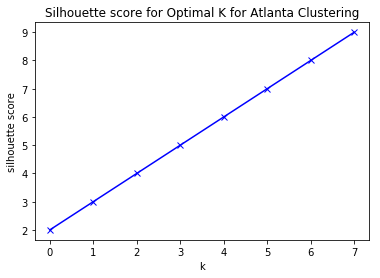

In [251]:
sil=[]
K_sil= range(2,10)
Atlanta_grouped_clustering = Atlanta_grouped.drop('Neighborhood', 1)
for k in K_sil:
    print(k, end='')
    kmeansATL=KMeans(n_clusters= k).fit(Atlanta_grouped_clustering)
    labels= kmeansATL.labels_
    sil.append(silhouette_score(Atlanta_grouped_clustering, labels, metric='euclidean'))
    
    import matplotlib.pyplot as plt
plt.plot(K_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score for Optimal K for Atlanta Clustering')
plt.show()

### Elbow Method

23456789

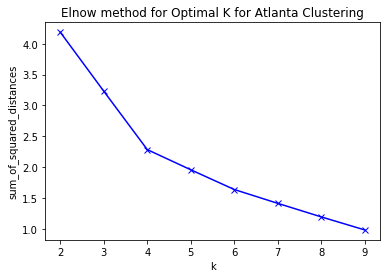

In [252]:
sum_of_squared_distances = []
K=range(2,10)
Atlanta_grouped_clustering = Atlanta_grouped.drop('Neighborhood', 1)
for k in K:
    print(k, end='')
    kmeansATL=KMeans(n_clusters= k).fit(Atlanta_grouped_clustering)
    sum_of_squared_distances.append(kmeansATL.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elnow method for Optimal K for Atlanta Clustering')
plt.show()

### Though it seems 4 may be the best K according to the elbow method, I am going to set K to 5 to better compare to the Oxford Neighborhood Clustering data

In [271]:
kclusters = 5

Atlanta_grouped_clustering = Atlanta_grouped.drop('Neighborhood', 1)

kmeans_Atlanta = KMeans(n_clusters=kclusters, random_state=0).fit(Atlanta_grouped_clustering)

kmeans_Atlanta.labels_[1:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 4], dtype=int32)

### Create a new dataframe with cluster labels appended

In [ ]:
ATL_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_Atlanta.labels_)

ATL_merged2 = merged_ATL

ATL_merged2 = ATL_merged2.join(ATL_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [182]:
ATL_merged2.head()

,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,30303,Downtown Atlanta,33.752856,-84.39013,0.0,Sandwich Place,Theater,Mexican Restaurant,Cuban Restaurant,Mediterranean Restaurant,Korean Restaurant,Caribbean Restaurant,Food Service,Lounge,Coffee Shop
1,30305,"Buckhead, Garden Hills, Peachtree Hills",33.830054,-84.38472,0.0,Italian Restaurant,Pizza Place,Shipping Store,Gym,Intersection,Miscellaneous Shop,Mobile Phone Shop,Farmers Market,Park,Cuban Restaurant
2,30306,"Virginia Highlands, Morningside",33.786755,-84.35149,0.0,Yoga Studio,BBQ Joint,Deli / Bodega,Coffee Shop,Café,Mexican Restaurant,Doctor's Office,Massage Studio,Boutique,Gift Shop
3,30307,"Candler Park, Inman Park, Lake Claire, Druid H...",33.768205,-84.33786,0.0,Playground,Park,Outdoor Sculpture,Athletics & Sports,Church,Tennis Court,Basketball Court,Golf Course,Farmers Market,Food Service
4,30308,"Midtown Atlanta, Old Fourth Ward",33.771755,-84.38065,0.0,Southern / Soul Food Restaurant,New American Restaurant,Pizza Place,Coffee Shop,Martial Arts Dojo,Lounge,Donut Shop,Brewery,Cuban Restaurant,Gay Bar


### Make sure the Cluster labels are Integers

In [183]:
Atlanta_merged_Final = ATL_merged2.dropna()
Atlanta_merged_Final['Cluster Labels'] =Atlanta_merged_Final['Cluster Labels'].astype(int)
Atlanta_merged_Final.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,30303,Downtown Atlanta,33.752856,-84.39013,0,Sandwich Place,Theater,Mexican Restaurant,Cuban Restaurant,Mediterranean Restaurant,Korean Restaurant,Caribbean Restaurant,Food Service,Lounge,Coffee Shop
1,30305,"Buckhead, Garden Hills, Peachtree Hills",33.830054,-84.38472,0,Italian Restaurant,Pizza Place,Shipping Store,Gym,Intersection,Miscellaneous Shop,Mobile Phone Shop,Farmers Market,Park,Cuban Restaurant
2,30306,"Virginia Highlands, Morningside",33.786755,-84.35149,0,Yoga Studio,BBQ Joint,Deli / Bodega,Coffee Shop,Café,Mexican Restaurant,Doctor's Office,Massage Studio,Boutique,Gift Shop
3,30307,"Candler Park, Inman Park, Lake Claire, Druid H...",33.768205,-84.33786,0,Playground,Park,Outdoor Sculpture,Athletics & Sports,Church,Tennis Court,Basketball Court,Golf Course,Farmers Market,Food Service
4,30308,"Midtown Atlanta, Old Fourth Ward",33.771755,-84.38065,0,Southern / Soul Food Restaurant,New American Restaurant,Pizza Place,Coffee Shop,Martial Arts Dojo,Lounge,Donut Shop,Brewery,Cuban Restaurant,Gay Bar


## Map the clustered neighborhoods in Atlanta, GA, USA

In [184]:
map_atlanta_clusters = folium.Map(location=[latitude_ATL, longitude_ATL], zoom_start=11)


x = np.arange(kclustersATL)
ys = [i + x + (i*x)**2 for i in range(kclustersATL)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Atlanta_merged_Final['Latitude'], Atlanta_merged_Final['Longitude'], Atlanta_merged_Final['Neighborhood'], Atlanta_merged_Final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow [cluster-1],
        fill=True,
        fill_color=rainbow [cluster-1],
        fill_opacity=0.9).add_to(map_atlanta_clusters)
       
map_atlanta_clusters

## View a list of the Neighborhood clusters for Atlanta and label them by top venues

## Cluster 0 (Red): Restaurants, Businesses, Breweries, Music Venues, Bars

In [185]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 0, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Atlanta,Sandwich Place,Theater,Mexican Restaurant,Cuban Restaurant,Mediterranean Restaurant,Korean Restaurant,Caribbean Restaurant,Food Service,Lounge,Coffee Shop
1,"Buckhead, Garden Hills, Peachtree Hills",Italian Restaurant,Pizza Place,Shipping Store,Gym,Intersection,Miscellaneous Shop,Mobile Phone Shop,Farmers Market,Park,Cuban Restaurant
2,"Virginia Highlands, Morningside",Yoga Studio,BBQ Joint,Deli / Bodega,Coffee Shop,Café,Mexican Restaurant,Doctor's Office,Massage Studio,Boutique,Gift Shop
3,"Candler Park, Inman Park, Lake Claire, Druid H...",Playground,Park,Outdoor Sculpture,Athletics & Sports,Church,Tennis Court,Basketball Court,Golf Course,Farmers Market,Food Service
4,"Midtown Atlanta, Old Fourth Ward",Southern / Soul Food Restaurant,New American Restaurant,Pizza Place,Coffee Shop,Martial Arts Dojo,Lounge,Donut Shop,Brewery,Cuban Restaurant,Gay Bar
5,"Ansley Park, Midtown Atlanta",Music Venue,Sandwich Place,Café,American Restaurant,Breakfast Spot,History Museum,Hotel,Jewelry Store,Gas Station,Monument / Landmark
6,"West End, Sylvan Hills, Adair Park",Brewery,Beer Store,Paper / Office Supplies Store,Food,Trail,Thrift / Vintage Store,Market,Intersection,Pop-Up Shop,Gas Station
7,"Grant Park, Cabbagetown, Old Fourth Ward",American Restaurant,Coffee Shop,Burger Joint,Gas Station,Pizza Place,Trail,Seafood Restaurant,Diner,Ethiopian Restaurant,Cupcake Shop
9,"Cabbagetown, East Atlanta Village, Ormewood Park",Home Service,Cosmetics Shop,Park,Grocery Store,Yoga Studio,Farmers Market,Football Stadium,Food Service,Food,Flower Shop
10,"Kirkwood, East Lake, Edgewood",Spa,Pizza Place,Bakery,Pet Store,Coffee Shop,Flower Shop,Sandwich Place,Breakfast Spot,Juice Bar,Sports Bar


## Cluster 1 (Purple): Events, Business, Fitness, and Fast Food

In [253]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 1, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"Underwood Hills, Midtown West",Event Service,Yoga Studio,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Football Stadium,Food Service,Food,Flower Shop,Farmers Market


## Cluster 2 (Light Blue): Nature, Restaurants, Stadiums

In [254]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 2, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,"Oak Grove, Sagamore Hills",Lake,Frozen Yogurt Shop,French Restaurant,Football Stadium,Food Service,Food,Flower Shop,Fast Food Restaurant,Farmers Market,Yoga Studio


## Cluster 3 (Light Green): Fitness venues, Farmers Markets and Stadiums

In [255]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 3, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"Sandy Springs, Buckead",Gym / Fitness Center,Yoga Studio,Farmers Market,French Restaurant,Football Stadium,Food Service,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant


## Cluster 4 (Orange): Soul Food Restaurants, Shops and Playgrounds

In [256]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 4, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Grant Park, Peoplestown, Choosewood Park",Southern / Soul Food Restaurant,Discount Store,Playground,Diner,Doctor's Office,Donut Shop,Ethiopian Restaurant,Event Service,Event Space,Frozen Yogurt Shop
